# Assignment 3

In [18]:
import pip
pip.main(['install','seaborn'])

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
You should consider upgrading via the 'c:\users\dvone\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


0

In [19]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
import numpy as np # For working with multidimensional array and matrix data structures.
import matplotlib.pyplot as plt # Used for plotting graphs.

# Do it yourself

You will be asked to implement K-means and GMM yourself in this section.

## Generate Random Data

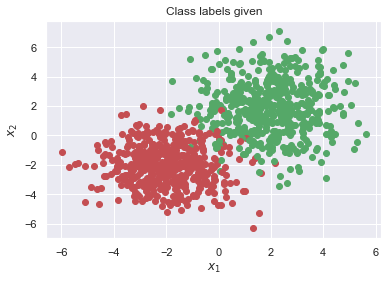

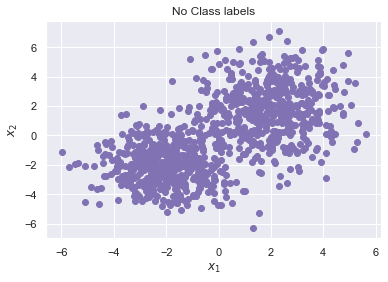

In [21]:
# Training data - two randomly-generated Gaussian-distributed clouds of points in 2d space
np.random.seed(0)
# Number of points
N = 1000
# Labels for each cluster
y = np.random.randint(low=0, high=2, size = N)
c = np.array(["r","g"])
# Mean of each cluster
means = np.array([[-2, 2], [-2, 2],])
# Covariance (in X and Y direction) of each cluster
covariances = np.random.random_sample((2, 2)) + 1
# Dimensions of each point
X = np.vstack([np.random.randn(N)*covariances[0, y] + means[0, y],
               np.random.randn(N)*covariances[1, y] + means[1, y]])

for k in range(X.shape[1]):
    plt.plot(X[0,k],X[1,k],c[y[k]]+"o")
    
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Class labels given")
plt.show()

for k in range(X.shape[1]):
    plt.plot(X[0,k],X[1,k],"m"+"o")
    
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("No Class labels")
plt.show()

# Plot the data

## K-means

**Please write a generic python function (in a separate package) which implements a generic version of the K-means algorithm. Your function should take as input a $d$-dimensional data set and the number of clusters into which you wish to group your data set. Return the means of your K-clusters and the assigned labels of your dataset (use 1-of-K coding to represent your labels). Initialize your means with two random samples.**

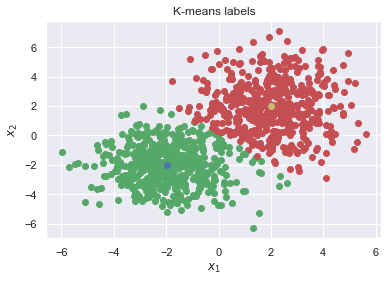

In [22]:
from importer import *
from kmeans import *

X, y = kmeans_data()
u, labels = kmeans(X, K=2, max_iter=100)

c = np.array(["r","g","b","y"])
for k in range(X.shape[1]):
    plt.plot(X[0,k],X[1,k],c[labels[k]]+"o")
for k in range(len(u)):
    plt.plot(u[k][0],u[k][1],c[3-k]+"o")
    
    
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("K-means labels")
plt.show()

In [23]:
from IPython.display import HTML
from IPython.display import display
from IPython.display import Image

**Use your newly created function to assign labels to the random dataset we generated above. Plot the data and their newly assigned labels. Also plot the mean of the two clusters. Your generated plot should resemble the following:**

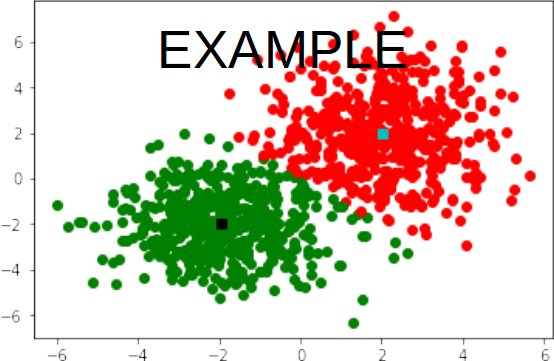

In [24]:
display(Image(filename='./kmeans.jpg'))

$x_1$ is on the $x$-axis and $x_2$ is on the $y$-axis.

# Perform K-means on an image

In [25]:
from skimage import io  # for loading an image from a file.
import seaborn as sns; sns.set()  # for plot styling - has to be imported before matplotlib
from sklearn.datasets import load_sample_image # imports available image from sklean dataset

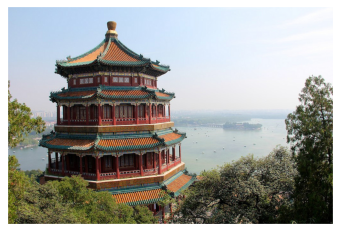

In [26]:
china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);

In [27]:
# Reshape the image
data = china / 255.0 # use 0...1 scale
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

# Visualise possible colors from the image, using a k-means clustering across the pixel space


In [28]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

##### The  MiniBatchKmeans is a variant of the KMeans algorithm which uses mini-batches to reduce the computation time, 
instead of using the full dataset at each iteration while still attempting to optimize the same objective function. 
 Mini-batches are subsets of the input data, randomly sampled in each training iteration. 
This increases the speed of the algorithm by a factor of 3–4 typically. Especially important, it makes it possible to cluster huge datasets that do not fit in memory.

Color Quantization is the process of reducing the number of colors in an image while keeping the visual appearance of the image intact. 
This is a useful image compression technique that is quite useful for devices that can show a limited number of colors due to memory restriction.

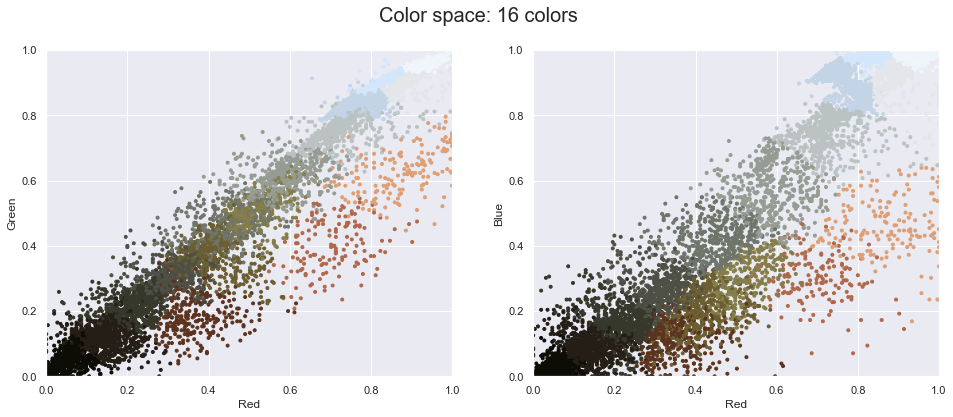

In [29]:
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)

new_colors = kmeans.cluster_centers_[kmeans.predict(data)]
plot_pixels(data, colors=new_colors, title="Color space: 16 colors")

In [30]:
from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider # for interactive slider

**Please create a widget function using the ipywidgets library of python that is already imported above and appy it to the image (china) above. Your function should take input K (the number of clusters) range slider. Hint: Read the documentation on ipywidgets. Reproducing the image using only 3 colors gives something like the following image.** 

**How many clusters do you need for a perfect reproduction?**

In [31]:
images = []
for k in range(1,33):
    kmeans = MiniBatchKMeans(k)
    pred = kmeans.fit_predict(data)
    pred = pred.reshape(427, 640)
    out = np.zeros((427, 640, 3))
    for x in range(427):
        for y in range(640):
            for z in range(3):
                out[x][y][z] = kmeans.cluster_centers_[int(pred[x,y])][z]
    images.append(out)
    if (k%5==0): print(k)

5
10
15
20
25
30


In [32]:
def kmeans_interact(k=0):
    ax = plt.axes(xticks=[], yticks=[])
    ax.imshow(images[k-1]);
    
w = interact(kmeans_interact, k =(1, 32))

interactive(children=(IntSlider(value=1, description='k', max=32, min=1), Output()), _dom_classes=('widget-int…

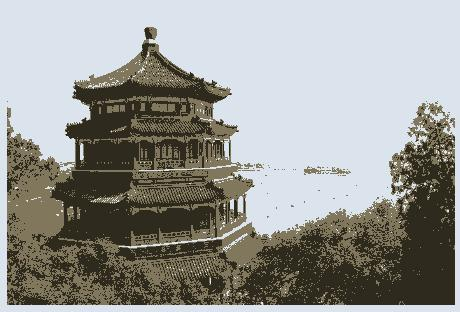

In [33]:
display(Image(filename='./Compressed.jpg'))

## K-means on image - own implementation

(3, 273280)

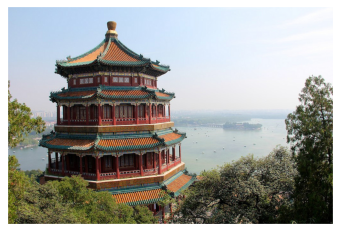

In [34]:
from importer import *
from pprint import pprint
from kmeans import *
from skimage import io
from sklearn.datasets import load_sample_image

china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china)
# Reshape the image
data = china / 255.0 # use 0...1 scale
data = data.reshape(427 * 640, 3).T
data.shape

In [35]:
means, labels = kmeans(data, K=3, max_iter=100)

In [36]:
labels = labels.reshape(427, 640)
out = np.zeros((427, 640, 3))
for x in range(427):
    for y in range(640):
        for z in range(3):
            out[x][y][z] = means[int(labels[x,y])][z]

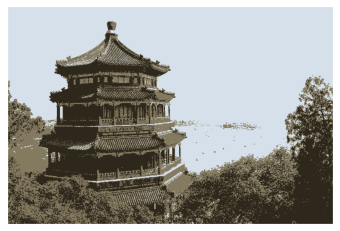

In [37]:
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(out);

## GMM

**Please write a generic python function (in a separate package) which implements a generic version of the Gaussian Mixture Models algorithm. Your function should take as input a $d$-dimensional data set and the number of clusters into which you wish to group your data set. Return the number of members, the means and covariances of your K-clusters. Also return the responsibilites of your observations (of every sample in your dataset). Use your K-means function to intialize your GMM.**

**Use your newly created function to cluster the generated data set at the start of the K-Means section. Plot the 95% confidence
interval of your data and use the responsibility of each data point to set the color of each sample.
Your generated plot should resemble the following:**

In [134]:
from gmm import gmm
from importer import *

X, y = gmm_data()
Prob, Nj, Uj, Sj = gmm(X, 2, 50)
N = X.shape[1]

[array([[2.01714002],
       [1.99252649]]), array([[-1.95256829],
       [-1.98928778]])]
[1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1
 0 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 0 0 1 1
 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 1 0
 1 1 1 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 1 1 0 1 1 1 1 1 0 1 1 0 1 0 0
 0 0 1 1 1 0 1 0 0 0 1 0 1 1 0 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1 0
 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1
 1 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1
 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 1 1 1 0 1 1 0 0 0 0 1 0 1 1
 1 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0
 0 0 0 0 0 1 1 1 1 0 0 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 1 0 0
 0 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1
 0 0 0 1 

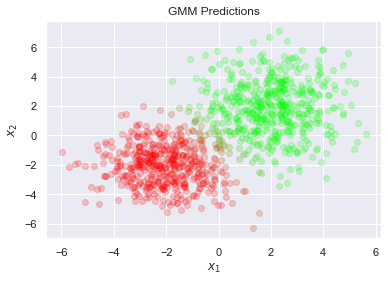

In [135]:
for n in range(N):
    color = np.zeros(3)
    color[0] = Prob[1,n]
    color[1] = Prob[0,n]
    plt.scatter(X[0,n],X[1,n],marker="o",c=color.reshape(1,-1), alpha=0.2)
    
# K = len(Nj)
# S = Sj[0] + Sj[1]
# CI = []
# for k in range(K):
#     for d in range(360):
#         r = d/180*np.pi
#         ci = np.zeros((2,360))
#         ci[0,d] = Uj[k][0] + 0.95 * np.cos(r) * np.sqrt(S[0,0])  # /np.sqrt(Nj[k])
#         ci[1,d] = Uj[k][1] + 0.95 * np.sin(r) * np.sqrt(S[1,1])  #/np.sqrt(Nj[k])
#         plt.plot(ci[0,d],ci[1,d],marker="o")
#     CI.append(ci)
    
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("GMM Predictions")
plt.show()

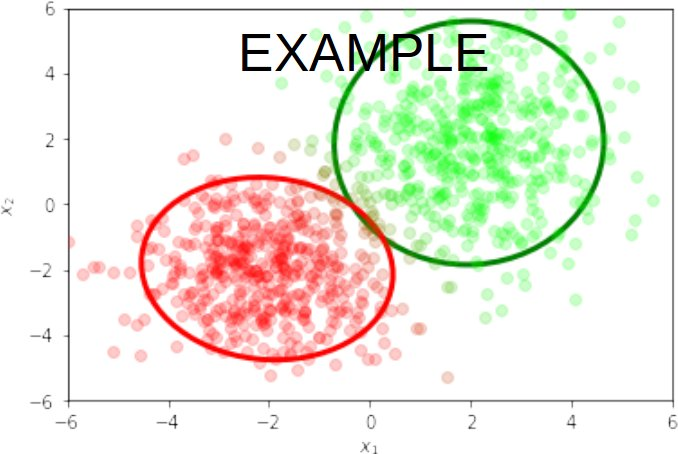

In [23]:
display(Image(filename='./gmm.jpg'))

# Clustering of digits data using GMM

For the next problem you will use GMM (scikit-learn version) to cluster the digits data in the scikit-learn library. 

## Load the digit datasets

The datasets are loaded into a dictionary.

In [89]:
# Import `datasets` from `sklearn`
from sklearn import datasets

# Load in the `digits` data
digits = datasets.load_digits()
print(digits.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [90]:
# Find the number of unique labels
number_digits = len(np.unique(digits.target))

print (number_digits)

10


## Inspect the different digit  images

In [26]:
import matplotlib.cm as cm # helps you work with grayscale images

In [27]:
def show_digits(k=0):
    """
    Show the digits in the training set
    """
    
    plt.imshow(digits.images[k], cmap=cm.binary)   
    
    plt.show()
    
w_show_digits = interact(show_digits, k =(0, 1796)) 


interactive(children=(IntSlider(value=0, description='k', max=1796), Output()), _dom_classes=('widget-interact…


**Next, fit the data to a 10 component GMM model, using the scikit-learn package.**

**Once you have built the GMM model, extract the means as well as the covariances of the 10 GMM components. Display the means to get something like the  image below.**

In [145]:
from sklearn.mixture import GaussianMixture

data = digits.data

gm = GaussianMixture(n_components=10)
gm.fit(data)
means = gm.means_.reshape(2,5,8,8)

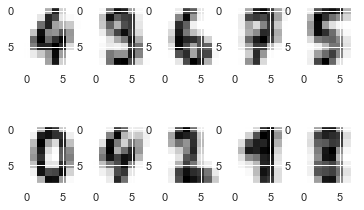

In [146]:
rows = 2
columns = 5
f, axarr = plt.subplots(rows,columns)
for r in range(rows):
    for c in range(columns):
        axarr[r,c].imshow(means[r,c], cmap=cm.binary)
plt.show()

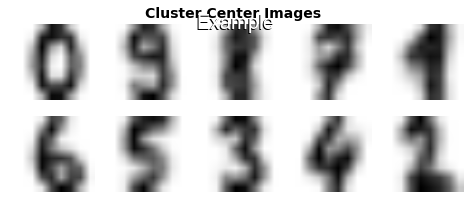

In [147]:
display(Image(filename='./wm_GMM.png'))

## GMM - own implementation

In [210]:
from sklearn import datasets
from kmeans import kmeans
digits = datasets.load_digits()
data = digits.data.T
number_digits = len(np.unique(digits.target))

In [211]:
Prob, Nj, Uj, Sj = gmm(data, number_digits, 9)
# means, labels = kmeans(data, K=number_digits, max_iter=1000)

i
0
k
0
k
1
k
2
k
3
k
4
k
5
k
6
k
7
k
8
k
9


C:\Users\dvone\Desktop\Engineering 4\Machine Learning E414\Assignments\CS_E414--Assignment_3\gmm.py:48: RuntimeWarning: invalid value encountered in true_divide
  for c, k in zip(C, range(K)):


i
1
k
0
k
1
k
2
k
3
k
4
k
5
k
6
k
7
k
8
k
9
i
2
k
0
k
1
k
2
k
3
k
4
k
5
k
6
k
7
k
8
k
9
i
3
k
0
k
1
k
2
k
3
k
4
k
5
k
6
k
7
k
8
k
9
i
4
k
0
k
1
k
2
k
3
k
4
k
5
k
6
k
7
k
8
k
9
i
5
k
0
k
1
k
2
k
3
k
4
k
5
k
6
k
7
k
8
k
9
i
6
k
0
k
1
k
2
k
3
k
4
k
5
k
6
k
7
k
8
k
9
i
7
k
0
k
1
k
2
k
3
k
4
k
5
k
6
k
7
k
8
k
9
i
8
k
0
k
1
k
2
k
3
k
4
k
5
k
6
k
7
k
8
k
9


ValueError: all input arrays must have the same shape

In [182]:
means_array = np.zeros((64,10))
for i in range(len(means)):
    means_array[:,i] = np.squeeze(means[i])

(2, 5, 8, 8)


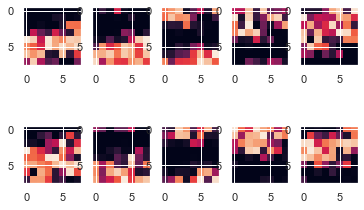

In [184]:
rows = 2
columns = 5
means_rc = means_array.reshape(rows,columns,8,8)
print(means_rc.shape)
f, axarr = plt.subplots(rows,columns)
for r in range(rows):
    for c in range(columns):
        axarr[r,c].imshow(means_rc[r,c])
plt.show()

## Generate samples

**Use the means and covariances of the different components and draw a sample from each component. Display the samples in an image.**

*Hint*: Read the documentation of scipy.stats.multivariate_normal

In [133]:
from scipy.stats import multivariate_normal

**Now can you try out the color quantization and digit analyses with your newly created implementations of k-means and GMM respectively and see if you get the same outputs.**